In [30]:
#Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import numpy as np
import json
import openweathermapy.core as owm
from datetime import datetime
from citipy import citipy
from pprint import pprint
from api_keys import api_key

In [35]:
# Create dataframe 
cities_list = pd.DataFrame()
cities_list["City"] = ""
cities_list["Country"] = ""

cities_list["Latitude"] = [np.random.uniform(-90, 90) for x in range(1500)]
cities_list["Longitude"] = [np.random.uniform(-180, 180) for x in range(1500)]
# Find city and country, using latitude and longitude
for index, row in cities_list.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    cities_list.at[index, "City"] = citipy.nearest_city(lat, lng).city_name
    cities_list.at[index, "Country"] = citipy.nearest_city(lat, lng).country_code
# Remove duplicates and re-create index
cities_list = cities_list.drop_duplicates(["City", "Country"])
cities_list = cities_list.reset_index()
# Just city and country columns
cities_list = cities_list[["City", "Country"]]
cities_list = cities_list.iloc[:500]
cities_list

,City,Country
0,evans,us
1,avarua,ck
2,ayios vasilios,gr
3,lazaro cardenas,mx
4,pevek,ru
5,gat,ly
6,nanortalik,gl
7,cape town,za
8,san carlos de bariloche,ar
9,miyazu,jp


In [36]:
# API calls
cities_list["Cloudiness"] = ""
cities_list["Date"] = ""
cities_list["Humidity"] = ""
cities_list["Latitude"] = ""
cities_list["Longitude"] = ""
cities_list["Max Temperature"] = ""
cities_list["Wind Speed"] = ""

row_counter = 1
# Create dictionary
settings = {"appid": api_key, "units": "imperial"}
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Create query url
query_url = f"{base_url}appid={settings['appid']}&units={settings['units']}&q="

print("Beginning Data Retrieval")
print("---------------------------")
# Iterrows in to loop city row
for index, row in cities_list.iterrows():
    try:
        cities_response = requests.get(query_url + row["City"] + "," + row["Country"])
        print(f"Processing Record {row_counter} | {row['City']}, {row['Country']}")
        print(cities_response.url)
        # Update row counter
        row_counter += 1
               # Turn cities response into json with owm module
        cities_response = owm.get_current(row["City"], **settings)
    
        # Create variables 
        lat_summary = ["coord.lat"]
        lon_summary = ["coord.lon"]
        temp_summary = ["main.temp_max"]
        humidity_summary = ["main.humidity"]
        cloud_summary = ["clouds.all"]
        wind_summary = ["wind.speed"]
        date_summary = ["dt"]
    
        # Add data into cities_list 
        cities_list.at[index, "Cloudiness"] =  cities_response(*cloud_summary)
        cities_list.at[index, "Date"] =  cities_response(*date_summary)
        cities_list.at[index, "Humidity"] = cities_response(*humidity_summary)
        cities_list.at[index, "Latitude"] =  cities_response(*lat_summary)
        cities_list.at[index, "Longitude"] =  cities_response(*lon_summary)
        cities_list.at[index, "Max Temperature"] = cities_response(*temp_summary)
        cities_list.at[index, "Wind Speed"] = cities_response(*wind_summary)
    except:
        print(f"**Weather data does not exist for {row['City']}, {row['Country']}**")
        continue
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
---------------------------
Processing Record 1 | evans, us
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=evans,us
Processing Record 2 | avarua, ck
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=avarua,ck
Processing Record 3 | ayios vasilios, gr
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=ayios%20vasilios,gr
Processing Record 4 | lazaro cardenas, mx
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=lazaro%20cardenas,mx
Processing Record 5 | pevek, ru
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=pevek,ru
Processing Record 6 | gat, ly
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=gat,ly
Processing Record 7 | nanortalik, gl
http:/

Processing Record 53 | georgetown, sh
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=georgetown,sh
Processing Record 54 | mar del plata, ar
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=mar%20del%20plata,ar
Processing Record 55 | goderich, sl
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=goderich,sl
Processing Record 56 | thio, nc
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=thio,nc
Processing Record 57 | misratah, ly
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=misratah,ly
Processing Record 58 | saint george, bm
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=saint%20george,bm
Processing Record 59 | esperance, au
http://api.openweathermap.org/data/2.

Processing Record 105 | new norfolk, au
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=new%20norfolk,au
Processing Record 106 | norman wells, ca
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=norman%20wells,ca
Processing Record 107 | henties bay, na
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=henties%20bay,na
Processing Record 108 | tura, ru
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=tura,ru
Processing Record 109 | kruisfontein, za
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=kruisfontein,za
Processing Record 110 | saint-georges, gf
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=saint-georges,gf
Processing Record 111 | totma, ru
http://api.openwea

Processing Record 158 | crotone, it
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=crotone,it
Processing Record 159 | chumikan, ru
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=chumikan,ru
Processing Record 160 | touros, br
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=touros,br
Processing Record 161 | alofi, nu
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=alofi,nu
Processing Record 162 | barrow, us
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=barrow,us
Processing Record 163 | shahrud, ir
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=shahrud,ir
Processing Record 164 | gladstone, au
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d

Processing Record 209 | mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=mahebourg,mu
Processing Record 210 | sitka, us
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=sitka,us
Processing Record 211 | luganville, vu
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=luganville,vu
Processing Record 212 | ribeira grande, pt
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=ribeira%20grande,pt
Processing Record 213 | husavik, is
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=husavik,is
Processing Record 214 | ngunguru, nz
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=ngunguru,nz
Processing Record 215 | cherskiy, ru
http://api.openweathermap.org/data/2.5/

Processing Record 261 | eston, ca
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=eston,ca
Processing Record 262 | nantucket, us
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=nantucket,us
Processing Record 263 | yerbogachen, ru
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=yerbogachen,ru
Processing Record 264 | nara, ml
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=nara,ml
Processing Record 265 | constitucion, mx
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=constitucion,mx
Processing Record 266 | cap malheureux, mu
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=cap%20malheureux,mu
Processing Record 267 | mogadishu, so
http://api.openweathermap.org/data

Processing Record 313 | kuusamo, fi
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=kuusamo,fi
Processing Record 314 | babanusah, sd
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=babanusah,sd
**Weather data does not exist for babanusah, sd**
Processing Record 315 | kysyl-syr, ru
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=kysyl-syr,ru
Processing Record 316 | dinar, tr
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=dinar,tr
Processing Record 317 | saint-pierre, pm
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=saint-pierre,pm
Processing Record 318 | labuhan, id
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=labuhan,id
Processing Record 319 | dalbandin, p

Processing Record 366 | iqaluit, ca
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=iqaluit,ca
Processing Record 367 | quatre cocos, mu
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=quatre%20cocos,mu
Processing Record 368 | hofn, is
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=hofn,is
Processing Record 369 | mount isa, au
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=mount%20isa,au
Processing Record 370 | camarzana, ro
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=camarzana,ro
Processing Record 371 | darnah, ly
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=darnah,ly
Processing Record 372 | tynda, ru
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 419 | hualmay, pe
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=hualmay,pe
Processing Record 420 | vila franca do campo, pt
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=vila%20franca%20do%20campo,pt
Processing Record 421 | dubbo, au
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=dubbo,au
Processing Record 422 | harlingen, nl
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=harlingen,nl
Processing Record 423 | faya, td
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=faya,td
Processing Record 424 | diamantino, br
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=diamantino,br
Processing Record 425 | bandarbeyla, so
http://api.openweathermap.or

Processing Record 471 | dicabisagan, ph
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=dicabisagan,ph
Processing Record 472 | murmashi, ru
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=murmashi,ru
Processing Record 473 | altamira, br
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=altamira,br
Processing Record 474 | chemal, ru
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=chemal,ru
Processing Record 475 | masyaf, sy
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=masyaf,sy
Processing Record 476 | salalah, om
http://api.openweathermap.org/data/2.5/weather?appid=eb3cd7e625a848d5e04b7f86605eb611&units=imperial&q=salalah,om
Processing Record 477 | beyneu, kz
http://api.openweathermap.org/data/2.5/weather?appid=eb3c

In [37]:
cities_list

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,evans,us,1,1554859533,21,40.38,-104.69,73.4,5.82
1,avarua,ck,0,1554858000,58,-21.21,-159.78,82.4,14.99
2,ayios vasilios,gr,8,1554859604,70,37.8,22.8,57.99,8.99
3,lazaro cardenas,mx,5,1554859620,11,28.39,-105.62,89.6,6.93
4,pevek,ru,0,1554859751,81,69.7,170.27,13.17,6.42
5,gat,ly,0,1554858000,46,14.69,-16.54,73.4,20.8
6,nanortalik,gl,0,1554859752,82,60.14,-45.24,36.35,48.14
7,cape town,za,0,1554859691,82,-33.93,18.42,71.01,2.24
8,san carlos de bariloche,ar,20,1554858000,76,-41.13,-71.31,51.8,11.41
9,miyazu,jp,75,1554858000,100,35.58,135.2,37.4,10.29


In [67]:
cities_list.to_csv("world_city_data.csv", index=False)

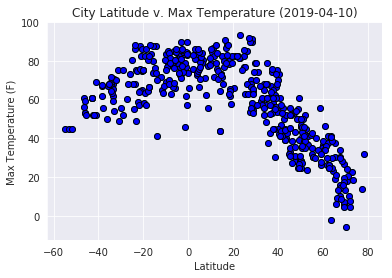

In [87]:
# Temperature v. Latitude
timestamp = cities_list["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

Lat = pd.to_numeric(cities_list["Latitude"])
Temp = pd.to_numeric(cities_list["Max Temperature"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_list, x=Lat, y=Temp, fit_reg=False)
plt.title(f"City Latitude v. Max Temperature ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x=Lat, y=Temp, color="blue", alpha=1, edgecolor="black")
plt.savefig("Latitude_Temp.png")
plt.show()

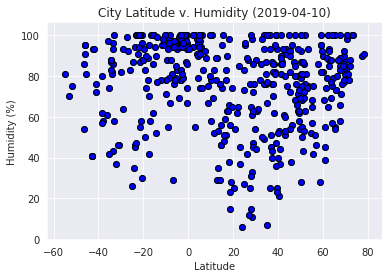

In [88]:
# Humidity (%) v. Latitude
Hum = pd.to_numeric(cities_list["Humidity"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_list, x=Lat, y=Hum, fit_reg=False)
plt.title(f"City Latitude v. Humidity ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x=Lat, y=Hum, color="blue", alpha=1, edgecolor="black")
plt.savefig("Latitude_Humidity.png")
plt.show()

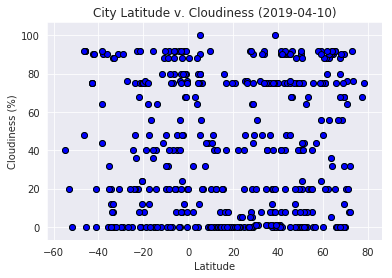

In [89]:
# Cloudiness (%) v. Latitude
Cloud = pd.to_numeric(cities_list["Cloudiness"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_list, x=Lat, y=Cloud, fit_reg=False)
plt.title(f"City Latitude v. Cloudiness ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x=Lat, y=Cloud, color="blue", alpha=1, edgecolor="black")
plt.savefig("Latitude_Cloud.png")
plt.show()

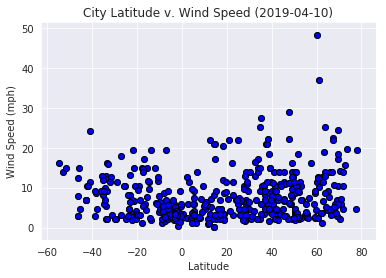

In [90]:
# Wind Speed (mph) v. Latitude
Wind = pd.to_numeric(cities_list["Wind Speed"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_list, x=Lat, y=Wind, fit_reg=False)
plt.title(f"City Latitude v. Wind Speed ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x=Lat, y=Wind, color="blue", alpha=1, edgecolor="black")
plt.savefig("Latitude_Wind.png")
plt.show()